# Test d'ipotesi

In [73]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import ROOT

## BGO

I primi due valori più frequenti sono: [0.0, 877.9373335392254]


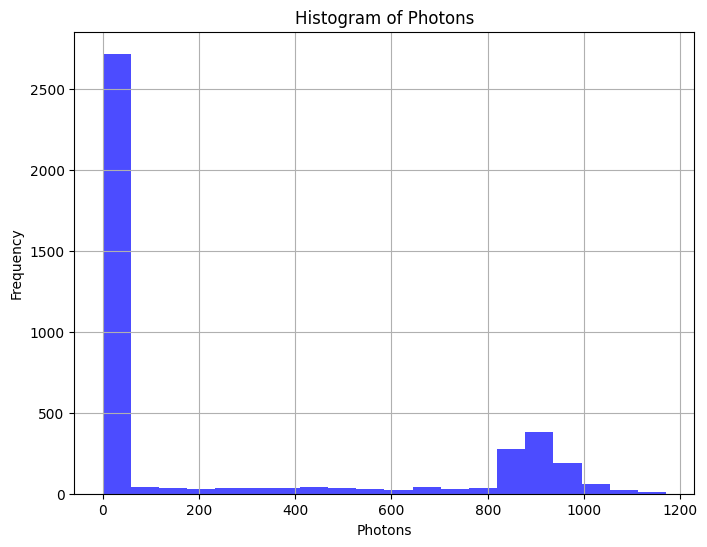

Primi 10 dati
     length_traveled  released_energy     photons  trigger  measure
21          0.001237         1.322925   88.139884     True     True
43          0.011086        11.856672  789.950742     True     True
65          0.013070        13.978571  931.322285     True     True
66          0.002998         3.205946  213.596131     True     True
78          0.013902        14.868601  990.620516     True     True
86          0.012405        13.267453  883.944052     True     True
88          0.012995        13.898547  925.990692     True     True
102         0.007749         8.287025  552.123035     True     True
116         0.012044        12.881172  858.208065     True     True
148         0.012163        13.008338  866.680495     True     True


In [74]:
%run ./Classe_2verticali_Efficienze.ipynb
a_t1 = 0.051 #m
b_t1 = 0.051
a_t2 = 0.052
b_t2 = 0.048
h_t = 0.054 
a_m = 0.05
b_m = 0.012
h_m = 0.012
detector_height = 0.001
total_time_hours = 48
density = 7130 #kg/m^3
muon_energy = 0.15 #MeV m^2 / kg
light_yield = 8200 #ph/MeV 
detection_eff = 0.26
geometric_eff = 0.0625 * 0.5

rivelatori = Rivelatori(a_t1, b_t1,a_t2, b_t2, h_t, a_m, b_m, h_m, detector_height, total_time_hours, density, muon_energy, light_yield, detection_eff, geometric_eff)

released_energy, photons, d_m, muon_df  = rivelatori.run(total_time_hours, get_dataframe=True, plot_graphs=True, plot_log_histogram=False)
released_energy, photons, d_m, muon_df = rivelatori.count_photons()

rivelatori.plot_rays(graph_rays = False)
rivelatori.plot_trigger(graph_trigger = False)
rivelatori.plot_measure(graph_measure = False)
print('Primi 10 dati')
print((muon_df.query('measure')).head(10))


In [75]:
%jsroot on

photons_list = (muon_df.query('measure'))['photons']

hist_poisson_BGO = ROOT.TH1D("poisson_hist", "Distribuzione di Poisson", 100, 0, 1500)

for elemento in photons_list:
    n_poisson_BGO = ROOT.gRandom.Poisson(elemento) #genero un numero casuale poissoniano attorno all' elemento
    hist_poisson_BGO.Fill(n_poisson_BGO)

c = ROOT.TCanvas("c")
hist_poisson_BGO.SetFillColor(ROOT.kBlue) 
hist_poisson_BGO.SetTitle(" Poisson ")
hist_poisson_BGO.Draw()
c.Draw()

Warning in <TROOT::Append>: Replacing existing TH1: poisson_hist (Potential memory leak).
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


In [76]:
#Riscalamento per la x 
%jsroot on

photons_list = (muon_df.query('measure'))['photons']
landau_list = []
nmax =0

hist_poisson_BGO = ROOT.TH1D("poisson_hist", "Distribuzione di Poisson", 100, 0, 1500)
hist_landau_BGO = ROOT.TH1D("landau_hist", "Landau", 100, 0, 1500)

for elemento in photons_list:
    
    n_poisson_BGO = ROOT.gRandom.Poisson(elemento) 
    hist_poisson_BGO.Fill(n_poisson_BGO)
    
    landau = ROOT.TF1("landau", "landau", 0, 500)
    v = (0.25) * n_poisson_BGO
    landau.SetParameters(1, v , 15)
    landau_list.append(landau)

hist_random_points = ROOT.TH1F("hist_random_points", "Random Points", 100, 0, 500)

for landau in landau_list:
    for _ in range(1):  
        random_point = landau.GetRandom()
        hist_random_points.Fill(random_point)


c = ROOT.TCanvas("c")
hist_random_points.SetFillColor(ROOT.kBlue) 
hist_random_points.SetTitle("Convoluzione simulata (BGO)")
hist_random_points.GetXaxis().SetTitle("Valori simulati BGO")
hist_random_points.Draw()

c.Draw()


bin_with_max_frequency = hist_random_points.GetMaximumBin()
mean = hist_random_points.GetXaxis().GetBinCenter(bin_with_max_frequency)
print(f"Valore medio (punto con la frequenza maggiore): {mean}")

Valore medio (punto con la frequenza maggiore): 232.5


Warning in <TROOT::Append>: Replacing existing TH1: poisson_hist (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: landau_hist (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: hist_random_points (Potential memory leak).
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


In [79]:
#fotoni
%jsroot on

photons_list = (muon_df.query('measure'))['photons']
landau_list = []
nmax =0

hist_poisson_BGO = ROOT.TH1D("poisson_hist", "Distribuzione di Poisson", 100, 0, 1500)
hist_landau_BGO = ROOT.TH1D("landau_hist", "Landau", 100, 0, 1500)

for elemento in photons_list:
    n_poisson_BGO = ROOT.gRandom.Poisson(elemento) 
    hist_poisson_BGO.Fill(n_poisson_BGO)
    
    landau = ROOT.TF1("landau", "landau", 0, 500)
    v = (0.25) * n_poisson_BGO
    landau.SetParameters(1, v , 15)
    landau_list.append(landau)

hist_random_points_fotoni = ROOT.TH1F("hist_random_points", "Random Points", 100, 0, 2000)

for landau in landau_list:
    for _ in range(1):  
        random_point = landau.GetRandom()
        hist_random_points_fotoni.Fill(random_point / 0.25)


c = ROOT.TCanvas("c")
hist_random_points_fotoni.SetFillColor(ROOT.kBlue) 
hist_random_points_fotoni.SetTitle("Distribuzione Fotoni (BGO)")
hist_random_points_fotoni.GetXaxis().SetTitle("Valori simulati BGO")
hist_random_points_fotoni.Draw()

bin_with_max_frequency = hist_random_points_fotoni.GetMaximumBin()
mean = hist_random_points_fotoni.GetMean()

c.Draw()

Warning in <TROOT::Append>: Replacing existing TH1: poisson_hist (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: landau_hist (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: hist_random_points (Potential memory leak).
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


In [80]:
area_tot = hist_random_points.Integral(0, hist_random_points_fotoni.GetNbinsX() + 1)
alpha = 0.05
x_cut = 0 

while x_cut <= 2000:  
    area_from_x_cut = hist_random_points_fotoni.Integral(hist_random_points_fotoni.FindBin(x_cut), hist_random_points_fotoni.GetNbinsX() + 1)

    if area_from_x_cut / area_tot <= alpha:
        break
    x_cut += 1  

print(f"x_cut: {x_cut}")
print("Il numero di fotoni corrispondente è: ", x_cut )
print("mean: ", mean)
print("#fotoni dai quali siamo sicuri di distinguere i Fotoni Cherenkov", (x_cut - mean) )

x_cut: 1500
Il numero di fotoni corrispondente è:  1500
mean:  886.605432781973
#fotoni dai quali siamo sicuri di distinguere i Fotoni Cherenkov 613.394567218027


In [81]:
Ch_medi = 10.13
x_obs = mean + Ch_medi
area = hist_random_points_fotoni.Integral(hist_random_points_fotoni.FindBin(x_obs), hist_random_points_fotoni.GetNbinsX() + 1)
p_value = area / area_tot
print(f"p - value: {p_value}")

p - value: 0.572108843537415


L'ipotesi nulla in questo caso è solo scintillazione (solo fondo).
Questo significa che da x = x_cut siamo in grado di dire che possiamo scartare (a livello del 5% di confidenza) l'ipotesi di scintillazione. Confrontiamo quindi il valore di fotoni dal quale siamo in grado di distinguere il Cherenkov, con il valore di fotoni Cherenkov attesi, che sono $10$ per il BGO e $8$ per il PWO.

## PWO

I primi due valori più frequenti sono: [0.0, 17.41935104865031]


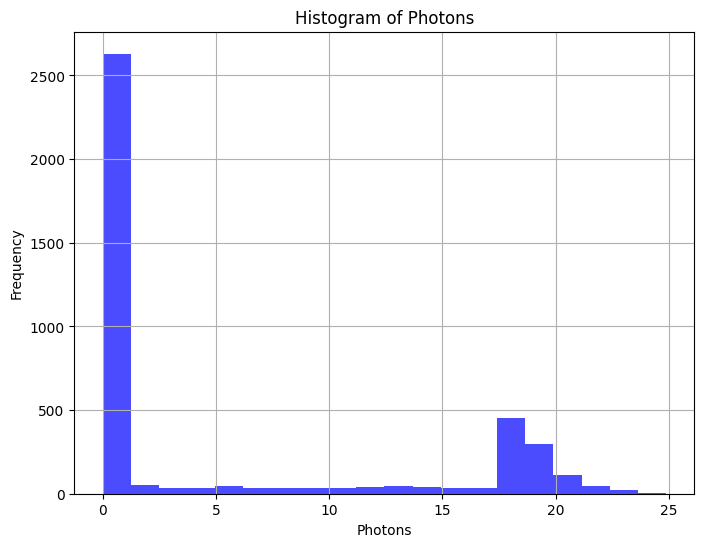

Primi 10 dati
    length_traveled  released_energy    photons  trigger  measure
2          0.012015        14.922372  17.720317     True     True
12         0.000433         0.538342   0.639281     True     True
21         0.003883         4.822442   5.726650     True     True
53         0.015950        19.810091  23.524483     True     True
69         0.007821         9.713296  11.534539     True     True
70         0.012232        15.192167  18.040698     True     True
72         0.014041        17.438437  20.708143     True     True
73         0.012333        15.317722  18.189795     True     True
78         0.010362        12.869936  15.283049     True     True
82         0.007747         9.621915  11.426024     True     True


In [89]:
%run ./Classe_2verticali_Efficienze.ipynb

a_t1 = 0.051 #m
b_t1 = 0.051
a_t2 = 0.052
b_t2 = 0.048
h_t = 0.054 
a_m = 0.05
b_m = 0.012
h_m = 0.012
detector_height = 0.001
total_time_hours = 48
density = 8280 #kg/m^3
muon_energy = 0.15 #MeV m^2 / kg
light_yield = 190 #ph/MeV 
detection_eff = 0.2
geometric_eff = 0.0625 * 0.5

rivelatori = Rivelatori(a_t1, b_t1,a_t2, b_t2, h_t, a_m, b_m, h_m, detector_height, total_time_hours, density, muon_energy, light_yield, detection_eff, geometric_eff)

released_energy, photons, d_m, muon_df  = rivelatori.run(total_time_hours, get_dataframe=True, plot_graphs=True, plot_log_histogram=False)
released_energy, photons, d_m, muon_df = rivelatori.count_photons()

rivelatori.plot_rays(graph_rays = False)
rivelatori.plot_trigger(graph_trigger = False)
rivelatori.plot_measure(graph_measure = False)
print('Primi 10 dati')
print((muon_df.query('measure')).head(10))

In [90]:
#poisson
%jsroot on

photons_list = (muon_df.query('measure'))['photons']

hist_poisson_PWO = ROOT.TH1D("poisson_hist", "Distribuzione di Poisson", 10, 0, 10)

for elemento in photons_list:
    n_poisson_PWO = ROOT.gRandom.Poisson(elemento) 
    hist_poisson_PWO.Fill(n_poisson_PWO)

c = ROOT.TCanvas("c")
hist_poisson_PWO.SetFillColor(ROOT.kBlue) 
hist_poisson_PWO.SetTitle(" Poisson ")
hist_poisson_PWO.Draw()
c.Draw()

Warning in <TROOT::Append>: Replacing existing TH1: poisson_hist (Potential memory leak).
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


In [91]:
#Riscalamento per la x 
%jsroot on

photons_list = (muon_df.query('measure'))['photons']
landau_list = []
nmax =0

hist_poisson_PWO = ROOT.TH1D("poisson_hist", "Distribuzione di Poisson", 100, 0, 10)
hist_landau_PWO = ROOT.TH1D("landau_hist", "Landau", 100, 0,10)

for elemento in photons_list:
    
    n_poisson_PWO = ROOT.gRandom.Poisson(elemento) 
    hist_poisson_PWO.Fill(n_poisson_PWO)
    
    landau = ROOT.TF1("landau", "landau", 0, 30)
    v = (0.25)* elemento
    landau.SetParameters(1, v , 0.6)
    landau_list.append(landau)

hist_random_points = ROOT.TH1F("hist_random_points", "Random Points", 100, 0, 25)

for landau in landau_list:
    for _ in range(1):  
        random_point = landau.GetRandom()
        hist_random_points.Fill(random_point)


c = ROOT.TCanvas("c")
hist_random_points.SetFillColor(ROOT.kBlue) 
hist_random_points.SetTitle("Convoluzione simulata (PWO)")
hist_random_points.Draw()
c.Draw()
bin_with_max_frequency = hist_random_points.GetMaximumBin()
mean = hist_random_points.GetXaxis().GetBinCenter(bin_with_max_frequency)
print(f"Valore medio (punto con la frequenza maggiore): {mean}")

Valore medio (punto con la frequenza maggiore): 4.875


Warning in <TROOT::Append>: Replacing existing TH1: poisson_hist (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: landau_hist (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: hist_random_points (Potential memory leak).
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


In [94]:
%jsroot on

photons_list = (muon_df.query('measure'))['photons']
landau_list = []
nmax =0

hist_poisson_BGO = ROOT.TH1D("poisson_hist", "Distribuzione di Poisson", 100, 0, 10)
hist_landau_BGO = ROOT.TH1D("landau_hist", "Landau", 100, 0, 10)

for elemento in photons_list:
    n_poisson_BGO = ROOT.gRandom.Poisson(elemento) 
    hist_poisson_BGO.Fill(n_poisson_BGO)
    
    landau = ROOT.TF1("landau", "landau", 0, 30)
    v = (0.25) * n_poisson_BGO
    landau.SetParameters(1, v , 0.6)
    landau_list.append(landau)

hist_random_points_fotoni = ROOT.TH1F("hist_random_points", "Random Points", 100, 0, 100)

for landau in landau_list:
    for _ in range(1):  
        random_point = landau.GetRandom()
        hist_random_points_fotoni.Fill(random_point / 0.25)


c = ROOT.TCanvas("c")
hist_random_points_fotoni.SetFillColor(ROOT.kBlue) 
hist_random_points_fotoni.SetTitle("Distribuzione Fotoni (PWO)")
hist_random_points_fotoni.GetXaxis().SetTitle("Valori simulati PWO")
hist_random_points_fotoni.Draw()

mean = hist_random_points_fotoni.GetMean()
bin_with_max_frequency = hist_random_points_fotoni.GetMaximumBin()
moda = hist_random_points_fotoni.GetXaxis().GetBinCenter(bin_with_max_frequency)
print(f"Valore medio (punto con la frequenza maggiore): {mean}")
c.Draw()

Valore medio (punto con la frequenza maggiore): 22.757918570306497


Warning in <TROOT::Append>: Replacing existing TH1: poisson_hist (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: landau_hist (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: hist_random_points (Potential memory leak).
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


In [96]:
area_tot = hist_random_points.Integral(0, hist_random_points_fotoni.GetNbinsX() + 1)
alpha = 0.05
x_cut = 0 

while x_cut <= 100:  
    area_from_x_cut = hist_random_points_fotoni.Integral(hist_random_points_fotoni.FindBin(x_cut), hist_random_points_fotoni.GetNbinsX() + 1)

    if area_from_x_cut / area_tot <= alpha:
        break
    x_cut += 1  

print(f"x_cut: {x_cut}")
print("Il numero di fotoni corrispondente è: ", x_cut)
print("mean", mean)
print("moda", moda)
print("#fotoni dai quali siamo sicuri di distinguere i Fotoni Cherenkov", (x_cut - mean))

x_cut: 58
Il numero di fotoni corrispondente è:  58
mean 22.757918570306497
moda 15.5
#fotoni dai quali siamo sicuri di distinguere i Fotoni Cherenkov 35.2420814296935


In [88]:
Ch_medi = 8.41
x_obs = mean + Ch_medi
area = hist_random_points_fotoni.Integral(hist_random_points_fotoni.FindBin(x_obs), hist_random_points_fotoni.GetNbinsX() + 1)
p_value = area / area_tot
print(f"p - value: {p_value}")


p - value: 0.18855218855218855
